In [32]:
import pandas as pd
import numpy as np 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import datetime

In [24]:
url = 'https://drive.google.com/file/d/1Eru_UHVc3WLHVveC9Q8K9QUxlzYeHt18/view'

data = pd.read_csv('C:/Users/user/Downloads/energydata_complete.csv')
data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [25]:
data.shape

(19735, 29)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

<Axes: >

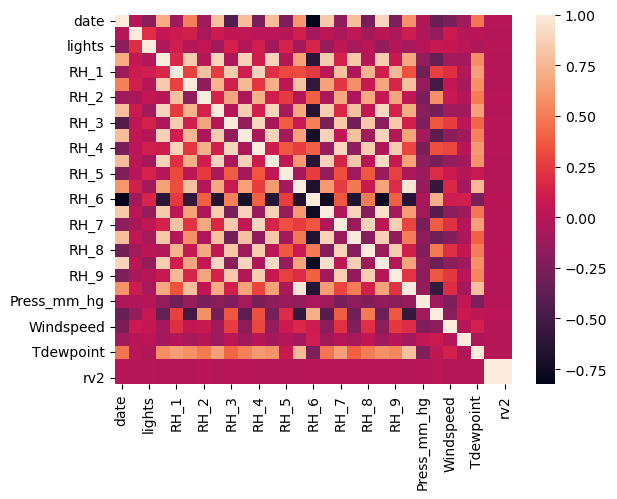

In [37]:
data['date'] = pd.to_datetime(data['date'])
sns.heatmap(data.corr())


In [55]:
# x = data['T2']
# y = data['T6']

Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [58]:
data = data.drop(['date', 'lights'], axis = 1)

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
y = normalised_df['Appliances']
x = normalised_df.drop(['Appliances'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.3,random_state=42)
model.fit(x_test, y_test)
predicted_values =model.predict(x_test)
rss = np.sum(np.square(y_test - predicted_values))
round(rss, 3)

110.357

In [84]:
coefficient_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})

# Print the DataFrame
print(coefficient_df)

        Feature  Coefficient
0            T1     0.005240
1          RH_1     0.543918
2            T2    -0.270845
3          RH_2    -0.504427
4            T3     0.280689
5          RH_3     0.101980
6            T4     0.031714
7          RH_4     0.068918
8            T5     0.008650
9          RH_5     0.011430
10           T6     0.250172
11         RH_6     0.026330
12           T7     0.019443
13         RH_7    -0.060217
14           T8     0.099398
15         RH_8    -0.155368
16           T9    -0.205022
17         RH_9    -0.036418
18        T_out    -0.336514
19  Press_mm_hg     0.001521
20       RH_out    -0.072626
21    Windspeed     0.024384
22   Visibility     0.008146
23    Tdewpoint     0.120103
24          rv1    -0.001152
25          rv2    -0.001152


In [86]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.089

In [89]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.0001)
lasso_reg.fit(x_train, y_train)
predicted_values = lasso_reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predicted_values))
round(rmse, 3)

0.09

In [78]:
model.score(x,y)

0.1460056732177779

In [57]:
x_train, x_test, y_train, y_test = train_test_split(, y, test_size = 0.2,random_state=1)

model = LinearRegression()
model.fit(x_test, y_test)


ValueError: Expected 2D array, got 1D array instead:
array=[18.29       20.945      23.29       ... 22.         18.06666667
 22.27714286].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.